### 데이터 import

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('../Data/scoring_result_0823_1341.csv')

#print(df.head())
pos = df[['위도','경도']]

### 최적 클러스터 수 구하기 위해 inertia 구하기

In [ ]:
kn = range(1,100)
inertias = []

for k in kn:
    model = KMeans(n_clusters=k, random_state=42, n_init=20)
    model.fit(pos)
    inertias.append(model.inertia_)

### 최적 클러스터 수 확인

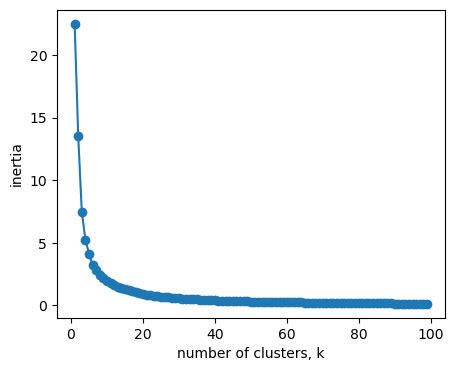

9


In [23]:
from matplotlib import pyplot as plt    
plt.figure(figsize=(5, 4))

plt.plot(kn, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

plt.show()

#최적 클러스터 수 확인 -> 9개
from kneed import KneeLocator

kl = KneeLocator(range(1,len(inertias)+1), inertias, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print(optimal_k)

### 클러스터링 진행

In [28]:
#clustering
k_num= 9
kmeans = KMeans(n_clusters=k_num, random_state=42, n_init=10)
kmeans.fit(pos)
df['labels']= kmeans.labels_

#클러스터링 한 후 중심점 위치 추출
#centers = kmeans.cluster_centers_
#dfcenters=pd.DataFrame(centers)

#print(df.head())

#파일로 출력
df.to_csv('../Data/scoring_result_0823_1341_cluster9_20231750.csv')

### 실루엣 계수

In [25]:
#실루엣 계수 계산
score_samples = silhouette_samples(pos, df.labels)
pos['silhoutte_coeff'] = score_samples

#실루엣 평균 값 계산 => 0.9923154955304742
average_score = silhouette_score(pos, df.labels)
print(pos.silhoutte_coeff.mean())

0.40638180779176936
